## learning-AI101 : insight 3
### split_sequence 함수에 대한 자세한 이해 및 샘플 데이터를 Conv1D, Conv2D, Conv3D로 design

<br>

- **site** : https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/
- **임규연 (lky473736)**
- 2024.08.05. ~ 2024.08.09.

------

- (1) split_sequence에 대한 이해 및 적용
- (2) split_sequence를 이용한 데이터셋 split 및 CNN
    - (2-1) Conv1D
    - (2-2) Conv2D
    - (2-3) Conv3D
    


In [208]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

----

### (1) split_sequence에 대한 이해 및 적용

split_sequence 함수는 위 **site**에서 나온 함수이다. 위 웹 문서는 시계열 데이터에 적합한 CNN 모델을 어떻게 designing할 지를 설명하고 있는데, 학습 전 dataset을 어떻게 만드는 지를 확인하기 위하여 이 함수가 등장하였다. 형태는 아래와 같다.

```python
# split a univariate sequence into samples
def split_sequence(sequence, n_steps) :
 X, y = list(), list() 
 for i in range(len(sequence)) :
 # find the end of this pattern
 end_ix = i + n_steps
 # check if we are beyond the sequence
 if end_ix > len(sequence)-1 :
    break
 # gather input and output parts of the pattern
 seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
 X.append(seq_x)
 y.append(seq_y)
 return array(X), array(y)
```

동작 방식을 기술하기 전, 아래에 예시 데이터를 위 함수에 대입 후 결과를 확인해보자.

In [209]:
# 사용 예

sequence = [i for i in range (1, 51)]

def split_sequence(sequence, n_steps):
    X, y = list(), list()

    for i in range (len(sequence)) :
        end_ix = i + n_steps
    
        if end_ix > len(sequence) - 1 :
            break
 
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
 
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

for i in range (5, 11) :
    print (f"**** n_steps == {i} ****")
    X_sample, y_sample = split_sequence(sequence, i)
    print (X_sample, y_sample)
    print ()

**** n_steps == 5 ****
[[ 1  2  3  4  5]
 [ 2  3  4  5  6]
 [ 3  4  5  6  7]
 [ 4  5  6  7  8]
 [ 5  6  7  8  9]
 [ 6  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 12]
 [ 9 10 11 12 13]
 [10 11 12 13 14]
 [11 12 13 14 15]
 [12 13 14 15 16]
 [13 14 15 16 17]
 [14 15 16 17 18]
 [15 16 17 18 19]
 [16 17 18 19 20]
 [17 18 19 20 21]
 [18 19 20 21 22]
 [19 20 21 22 23]
 [20 21 22 23 24]
 [21 22 23 24 25]
 [22 23 24 25 26]
 [23 24 25 26 27]
 [24 25 26 27 28]
 [25 26 27 28 29]
 [26 27 28 29 30]
 [27 28 29 30 31]
 [28 29 30 31 32]
 [29 30 31 32 33]
 [30 31 32 33 34]
 [31 32 33 34 35]
 [32 33 34 35 36]
 [33 34 35 36 37]
 [34 35 36 37 38]
 [35 36 37 38 39]
 [36 37 38 39 40]
 [37 38 39 40 41]
 [38 39 40 41 42]
 [39 40 41 42 43]
 [40 41 42 43 44]
 [41 42 43 44 45]
 [42 43 44 45 46]
 [43 44 45 46 47]
 [44 45 46 47 48]
 [45 46 47 48 49]] [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]

**** n_steps == 6 ****
[[ 1

위 출력을 보고 아래와 같은 사실을 짐작할 수 있다.

- (1) 이 함수는 특정 스텝에 따라 X의 component를 각각 생성 후, 그에 따른 y값은 X component의 마지막 인덱스 + 1의 값을 지정하여 dataset을 만드는 과정을 담고 있다는 것을 확인 가능하다. 잘 생각해보면, X와 y가 서로 붙어서 전진하면서 dataset을 이룬다. 
- (2) index out of range 문제를 해결하기 위하여, 만약 최종 인덱스보다 마지막 인덱스가 크다면, 즉 y가 존재할 인덱스가 마지막 인덱스보다 크다면 범위를 벗어나는 것이기에 반복문을 종료하는 것을 알 수 있다.
- (3) time-series data이기 때문에 각 데이터들의 선후관계 및 순서가 중요한 상황에서 현 방법은 매우 현명하다고 볼 수 있겠다.

따라서 **(2) split_sequence를 이용한 데이터셋 split 및 CNN**에서는 말 그대로, 위 함수를 사용하여 dataset을 만든 후, CNN을 진행한다.


-----

### (2) split_sequence를 이용한 데이터셋 split 및 CNN

각 demension에 맞게끔 sequence를 아래와 같이 준비한다.
- **Conv1D**
    - (1) 다음 데이터를 예측 
        - [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        - 만약 predict에 [8, 9, 10]를 대입하면 11이 나와야 한다.
    - (2) 합을 예측 (추후 구현 예정)
        - [[10, 20, 30], [5, 15, 20], [5, 30, 35], [49, 31, 80], [1, 2, 3], [40, 50, 90], [22, 33, 55], [3, 4, 7], [1000, 2000, 3000], [52, 0, 52]]
        - 만약 predict에 [42, 92]를 대입하면 134가 나와야 한다.
- **Conv2D**
    - [i for i in range (1, 51)] / n_steps : 3
    - 만약 predict에 [48, 49, 50]을 대입하면 51이 나와야 한다.
- **Conv3D**
    - [i for i in range (1, 101)] / n_steps : 5
    - 만약 predict에 [96, 97, 98, 99, 100]을 대입하면 101이 나와야 한다.



#### (2-1) Conv1D : 다음 데이터를 예측

In [210]:
# data preparing

sequence = [i for i in range (1, 11)]

def split_sequence(sequence, n_steps):
    X, y = list(), list()

    for i in range (len(sequence)) :
        end_ix = i + n_steps
    
        if end_ix > len(sequence) - 1 :
            break
 
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
 
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

X, y = split_sequence(sequence, 3)
X = X.reshape((X.shape[0], X.shape[1], 1)) # 차원 변환 (Conv1D에 대입하기 위함)
print (X, y) 

[[[1]
  [2]
  [3]]

 [[2]
  [3]
  [4]]

 [[3]
  [4]
  [5]]

 [[4]
  [5]
  [6]]

 [[5]
  [6]
  [7]]

 [[6]
  [7]
  [8]]

 [[7]
  [8]
  [9]]] [ 4  5  6  7  8  9 10]


Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_31 (Conv1D)          (None, 3, 32)             96        
                                                                 
 max_pooling1d_30 (MaxPooli  (None, 2, 32)             0         
 ng1D)                                                           
                                                                 
 conv1d_32 (Conv1D)          (None, 2, 16)             1040      
                                                                 
 max_pooling1d_31 (MaxPooli  (None, 1, 16)             0         
 ng1D)                                                           
                                                                 
 flatten_47 (Flatten)        (None, 16)                0         
                                                                 
 dense_127 (Dense)           (None, 16)              

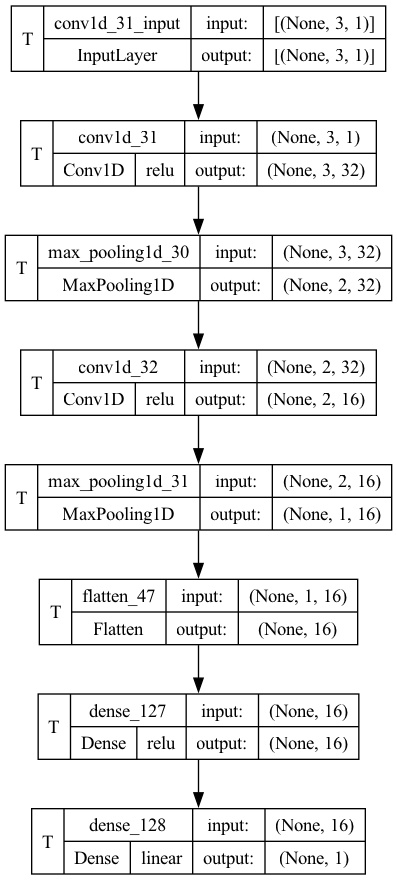

In [211]:
# modelling

from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = keras.Sequential([
    Conv1D(32, kernel_size=2, input_shape=(3, 1), padding='same', activation='relu'),
    MaxPooling1D(2, padding='same'),
    Conv1D(16, kernel_size=2, activation='relu', padding='same'),
    MaxPooling1D(2, padding='same'),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1)
])

model.summary()

keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True,
                      show_trainable=True)

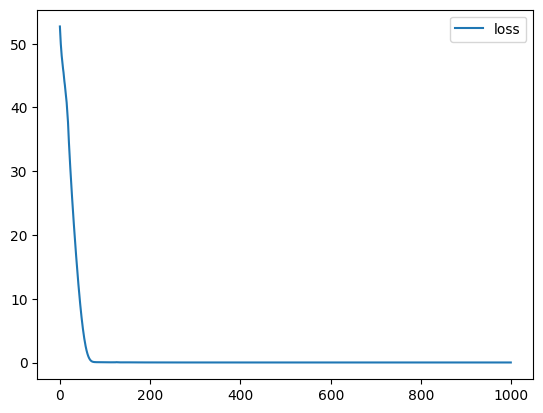

In [212]:
# compile and fit, visualization loss

model.compile (metrics='mse', loss='mse')
history = model.fit (X, y, epochs=1000, verbose=0)

print (history)
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

In [213]:
# prediction

model.predict([[[8], 
                [9], 
                [10]]])

1/1 [==============================] - 0s 84ms/step


array([[10.865884]], dtype=float32)

#### (2-2) Conv2D 

In [214]:
# data preparing

sequence = [i for i in range (1, 51)]

def split_sequence(sequence, n_steps):
    X, y = list(), list()

    for i in range (len(sequence)) :
        end_ix = i + n_steps
    
        if end_ix > len(sequence) - 1 :
            break
 
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
 
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

X, y = split_sequence(sequence, 3)
X = X.reshape((X.shape[0], X.shape[1], 1, 1)) # 차원 변환 (Conv2D에 대입하기 위함)
print (X, y) 
print (X.shape, y.shape)

[[[[ 1]]

  [[ 2]]

  [[ 3]]]


 [[[ 2]]

  [[ 3]]

  [[ 4]]]


 [[[ 3]]

  [[ 4]]

  [[ 5]]]


 [[[ 4]]

  [[ 5]]

  [[ 6]]]


 [[[ 5]]

  [[ 6]]

  [[ 7]]]


 [[[ 6]]

  [[ 7]]

  [[ 8]]]


 [[[ 7]]

  [[ 8]]

  [[ 9]]]


 [[[ 8]]

  [[ 9]]

  [[10]]]


 [[[ 9]]

  [[10]]

  [[11]]]


 [[[10]]

  [[11]]

  [[12]]]


 [[[11]]

  [[12]]

  [[13]]]


 [[[12]]

  [[13]]

  [[14]]]


 [[[13]]

  [[14]]

  [[15]]]


 [[[14]]

  [[15]]

  [[16]]]


 [[[15]]

  [[16]]

  [[17]]]


 [[[16]]

  [[17]]

  [[18]]]


 [[[17]]

  [[18]]

  [[19]]]


 [[[18]]

  [[19]]

  [[20]]]


 [[[19]]

  [[20]]

  [[21]]]


 [[[20]]

  [[21]]

  [[22]]]


 [[[21]]

  [[22]]

  [[23]]]


 [[[22]]

  [[23]]

  [[24]]]


 [[[23]]

  [[24]]

  [[25]]]


 [[[24]]

  [[25]]

  [[26]]]


 [[[25]]

  [[26]]

  [[27]]]


 [[[26]]

  [[27]]

  [[28]]]


 [[[27]]

  [[28]]

  [[29]]]


 [[[28]]

  [[29]]

  [[30]]]


 [[[29]]

  [[30]]

  [[31]]]


 [[[30]]

  [[31]]

  [[32]]]


 [[[31]]

  [[32]]

  [[33]]]


 [[[32]]

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 3, 1, 32)          160       
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 2, 1, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 2, 1, 16)          2064      
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 1, 1, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_48 (Flatten)        (None, 16)                0         
                                                                 
 dense_129 (Dense)           (None, 16)              

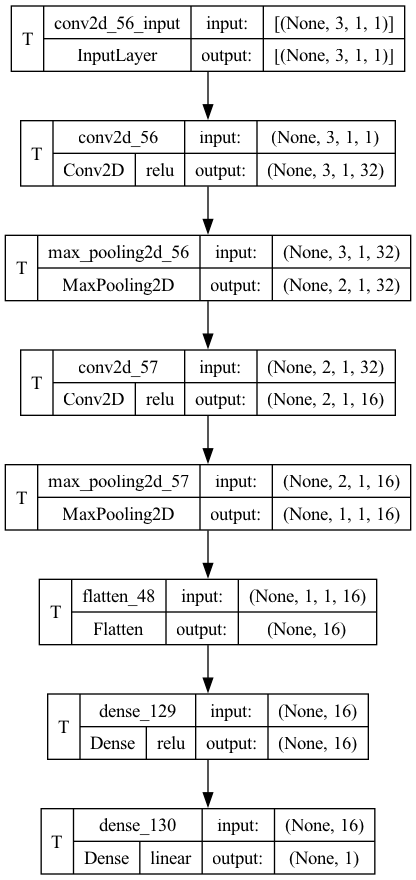

In [215]:
# modelling

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = keras.Sequential([
    Conv2D(32, kernel_size=2, input_shape=(3, 1, 1), padding='same', activation='relu'),
    MaxPooling2D((2, 1), padding='same'),
    Conv2D(16, kernel_size=2, activation='relu', padding='same'),
    MaxPooling2D((2, 1), padding='same'),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1)
])

model.summary()

keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True,
                      show_trainable=True)

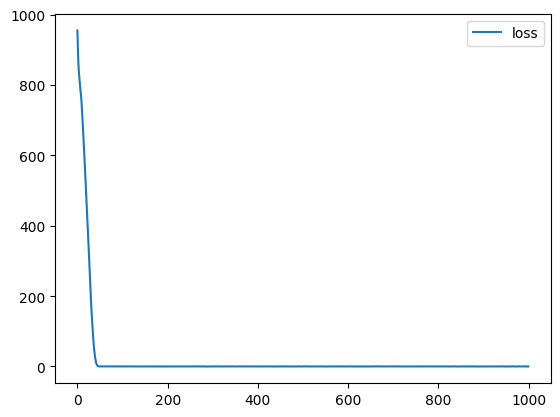

In [216]:
# compile and fit, loss graph

model.compile (metrics='mse', loss='mse')
history = model.fit (X, y, epochs=1000, verbose=0)

print (history)
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

In [217]:
# prediction

pred = np.array([[48], [49], [50]])
print(pred.shape)  # (3, 1)

pred = pred.reshape((1, pred.shape[0], pred.shape[1], 1))

model.predict(pred)

(3, 1)
1/1 [==============================] - 0s 62ms/step


array([[51.53568]], dtype=float32)

#### (2-3) Conv3D 

In [218]:
# data preparing

sequence = [i for i in range (1, 101)]

def split_sequence(sequence, n_steps):
    X, y = list(), list()

    for i in range (len(sequence)) :
        end_ix = i + n_steps
    
        if end_ix > len(sequence) - 1 :
            break
 
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
 
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

X, y = split_sequence(sequence, 5)
print (X.shape, y.shape)
X = X.reshape((X.shape[0], X.shape[1], 1, 1, 1)) # 차원 변환 (Conv1D에 대입하기 위함)
print (X, y) 

(95, 5) (95,)
[[[[[ 1]]]


  [[[ 2]]]


  [[[ 3]]]


  [[[ 4]]]


  [[[ 5]]]]



 [[[[ 2]]]


  [[[ 3]]]


  [[[ 4]]]


  [[[ 5]]]


  [[[ 6]]]]



 [[[[ 3]]]


  [[[ 4]]]


  [[[ 5]]]


  [[[ 6]]]


  [[[ 7]]]]



 [[[[ 4]]]


  [[[ 5]]]


  [[[ 6]]]


  [[[ 7]]]


  [[[ 8]]]]



 [[[[ 5]]]


  [[[ 6]]]


  [[[ 7]]]


  [[[ 8]]]


  [[[ 9]]]]



 [[[[ 6]]]


  [[[ 7]]]


  [[[ 8]]]


  [[[ 9]]]


  [[[10]]]]



 [[[[ 7]]]


  [[[ 8]]]


  [[[ 9]]]


  [[[10]]]


  [[[11]]]]



 [[[[ 8]]]


  [[[ 9]]]


  [[[10]]]


  [[[11]]]


  [[[12]]]]



 [[[[ 9]]]


  [[[10]]]


  [[[11]]]


  [[[12]]]


  [[[13]]]]



 [[[[10]]]


  [[[11]]]


  [[[12]]]


  [[[13]]]


  [[[14]]]]



 [[[[11]]]


  [[[12]]]


  [[[13]]]


  [[[14]]]


  [[[15]]]]



 [[[[12]]]


  [[[13]]]


  [[[14]]]


  [[[15]]]


  [[[16]]]]



 [[[[13]]]


  [[[14]]]


  [[[15]]]


  [[[16]]]


  [[[17]]]]



 [[[[14]]]


  [[[15]]]


  [[[16]]]


  [[[17]]]


  [[[18]]]]



 [[[[15]]]


  [[[16]]]


  [[[17]]]


  [[[18]]

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_8 (Conv3D)           (None, 5, 1, 1, 32)       288       
                                                                 
 max_pooling3d_8 (MaxPoolin  (None, 3, 1, 1, 32)       0         
 g3D)                                                            
                                                                 
 conv3d_9 (Conv3D)           (None, 3, 1, 1, 16)       4112      
                                                                 
 max_pooling3d_9 (MaxPoolin  (None, 2, 1, 1, 16)       0         
 g3D)                                                            
                                                                 
 flatten_49 (Flatten)        (None, 32)                0         
                                                                 
 dense_131 (Dense)           (None, 16)              

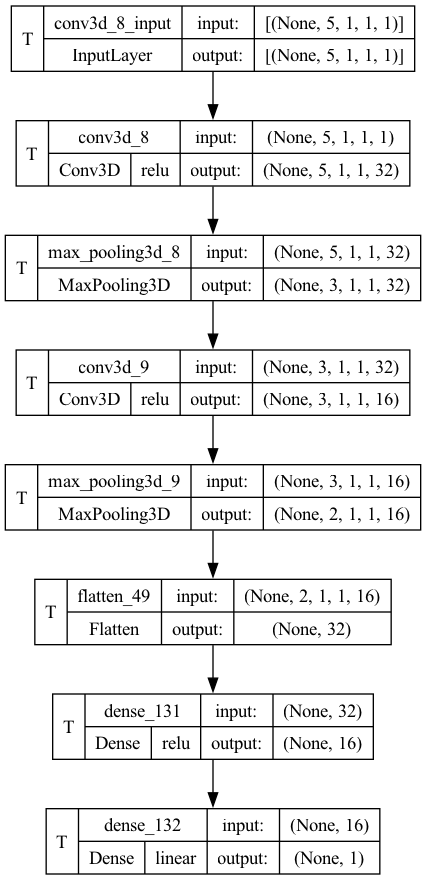

In [220]:
# modelling

from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout

model = keras.Sequential([
    Conv3D(32, kernel_size=2, input_shape=(5, 1, 1, 1), padding='same', activation='relu'),
    MaxPooling3D((2, 1, 1), padding='same'),
    Conv3D(16, kernel_size=2, activation='relu', padding='same'),
    MaxPooling3D((2, 1, 1), padding='same'),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1)
])

model.summary()

keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True,
                      show_trainable=True)

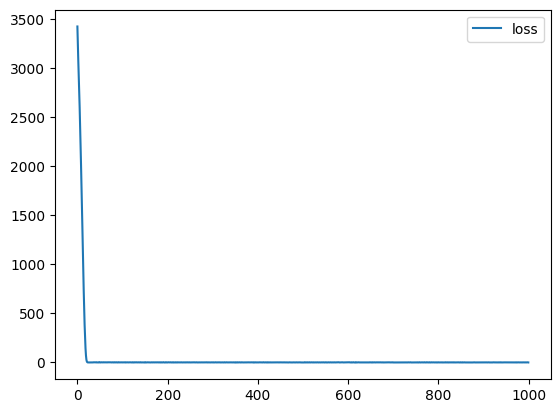

In [221]:
# compile and fit, visualization loss

model.compile (metrics='mse', loss='mse')
history = model.fit (X, y, epochs=1000, verbose=0)

print (history)
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

In [225]:
# prediction

pred = np.array([[96], [97], [98], [99], [100]])
print(pred.shape)  # (5, 1)

pred = pred.reshape((1, 5, 1, 1, 1))

model.predict(pred)

(5, 1)
1/1 [==============================] - 0s 19ms/step


array([[100.28658]], dtype=float32)